In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
path_train = 'final2/Training/train_engineered_cleaned_merged_flights_Jan_1w.csv'
path_vali = 'final2/Validation/vali_engineered_cleaned_merged_flights_Jan_1w.csv'
path_test = 'final2/Testing/test_engineered_cleaned_merged_flights_Jan_1w.csv'

In [3]:
df_train = pd.read_csv(path_train)
df_vali = pd.read_csv(path_vali)
df_test = pd.read_csv(path_test)

In [4]:
df_vali.rename(columns={'dep_delay': 'DelayD_carrier'}, inplace=True)
df_test.rename(columns={'dep_delay': 'DelayD_carrier', 'arr_delay': 'DelayA_carrier'}, inplace=True)

In [5]:
df_vali['delay'] = pd.Series([x if (x > 15) else 0 for x in df_vali['arr_delay']])
df_vali['delayed'] = pd.Series([0 if (x <= 0) else 1 for x in df_vali['arr_delay']])

In [6]:
df_train.columns[df_train.isnull().any()]

Index([], dtype='object')

In [7]:
df_vali.columns[df_vali.isnull().any()]

Index(['DelayA_origin_hourly', 'DelayA_carrier_hourly', 'DelayD_origin_hourly',
       'DelayD_carrier_hourly'],
      dtype='object')

In [8]:
df_test.columns[df_test.isnull().any()]

Index(['DelayD_origin', 'DelayD_dest', 'DelayA_origin', 'DelayA_dest',
       'DelayA_origin_hourly', 'DelayA_carrier_hourly', 'DelayD_origin_hourly',
       'DelayD_carrier_hourly'],
      dtype='object')

In [9]:
df_vali.shape

(96233, 79)

In [10]:
df_vali.dropna(axis=0, inplace=True)
df_vali.shape

(96119, 79)

## Coloumn Drop

In [11]:
train_vali_diff = df_train.columns.difference(df_vali.columns).to_list()
vali_train_diff = df_vali.columns.difference(df_train.columns).to_list()

In [12]:
train_vali_diff

['arr_time',
 'arr_time_hour',
 'arr_time_min',
 'cos_arr_time',
 'cos_dep_time',
 'dep_delay',
 'dep_time',
 'dep_time_hour',
 'dep_time_min',
 'late_aircraft_delay',
 'sin_arr_time',
 'sin_dep_time',
 'weather_delay']

In [13]:
vali_train_diff

[]

In [14]:
df_train = df_train.drop(train_vali_diff, axis=1)

In [15]:
vali_test_diff = df_vali.columns.difference(df_test.columns).to_list()
test_vali_diff = df_test.columns.difference(df_vali.columns).to_list()

In [16]:
vali_test_diff

['arr_delay',
 'delay',
 'delayed',
 'man_Aerospatiale/alenia',
 'man_Air Tractor Inc',
 'man_Avions De Transport Regional',
 'man_Benham John',
 'man_Cessna',
 'man_Cirrus Design Corp',
 'man_Dassault',
 'man_De Havilland Canada',
 'man_Diamond Aircraft Ind Gmbh',
 'man_Ela Aviacion',
 'man_Gulfstream Aerospace',
 'man_Mooney Aircraft Corp.',
 'man_Pilatus',
 'man_Quest Aircraft Company Llc',
 'man_Robinson Helicopter Co',
 'man_Saab',
 'man_Socata',
 'man_Tremble Jason M']

In [17]:
test_vali_diff

['man_C Series Aircraft Ltd Ptnrsp']

In [18]:
df_test.drop('man_C Series Aircraft Ltd Ptnrsp', inplace=True, axis=1)
df_train.drop(vali_test_diff[3:], inplace=True, axis=1)
df_vali.drop(vali_test_diff[3:], inplace=True, axis=1)

In [19]:
for diff in [df_train.columns.difference(df_vali.columns).to_list(), 
             df_vali.columns.difference(df_train.columns).to_list(),
             df_vali.columns.difference(df_test.columns).to_list(),
             df_test.columns.difference(df_vali.columns).to_list()]:
    print(diff)

[]
[]
['arr_delay', 'delay', 'delayed']
[]


In [20]:
df_train.columns

Index(['fl_date', 'op_unique_carrier', 'origin', 'dest', 'crs_dep_time',
       'crs_arr_time', 'arr_delay', 'distance', 'numflights', 'numstrikes',
       'strikeprob', 'percentflights', 'region_N', 'region_O', 'region_S',
       'region_W', 'man_Airbus', 'man_American Champion Aircraft',
       'man_Bell Helicopter Textron Canada', 'man_Boeing', 'man_Bombardier',
       'man_Canadair', 'man_Eads/alenia Atr', 'man_Embraer', 'man_Grumman',
       'man_Mcdonnell Douglas', 'man_Piper', 'aircraft_age',
       'type_large_airport', 'type_medium_airport', 'type_small_airport',
       'date', 'weekday', 'sin_weekday', 'cos_weekday', 'crs_dep_time_hour',
       'crs_dep_time_min', 'sin_crs_dep_time', 'cos_crs_dep_time',
       'crs_arr_time_hour', 'crs_arr_time_min', 'sin_crs_arr_time',
       'cos_crs_arr_time', 'delayed', 'delay', 'DelayD_carrier',
       'num_flights_carrier', 'DelayD_origin', 'num_flights_origin',
       'DelayD_dest', 'num_flights_dest', 'DelayA_carrier', 'DelayA_origin'

In [21]:
df_train[['arr_delay', 'distance', 'numflights', 'numstrikes',
       'strikeprob', 'percentflights', 'aircraft_age',
       'date', 'weekday', 'sin_weekday', 'cos_weekday', 'crs_dep_time_hour',
       'crs_dep_time_min', 'sin_crs_dep_time', 'cos_crs_dep_time',
       'crs_arr_time_hour', 'crs_arr_time_min', 'sin_crs_arr_time',
       'cos_crs_arr_time', 'DelayD_carrier', 'num_flights_carrier',
       'DelayD_origin', 'num_flights_origin', 'DelayD_dest',
       'num_flights_dest', 'DelayA_carrier', 'DelayA_origin', 'DelayA_dest',
       'DelayA_hourly', 'num_flights_hourly', 'DelayD_hourly',
       'DelayA_origin_hourly', 'DelayA_carrier_hourly', 'DelayD_origin_hourly',
       'DelayD_carrier_hourly']].describe().loc[['min','max']].T

,min,max
arr_delay,-8.200000e+02,1778.000000
distance,3.100000e+01,4983.000000
numflights,2.000000e+00,790253.000000
numstrikes,0.000000e+00,3799.000000
strikeprob,0.000000e+00,0.086329
percentflights,1.250634e-07,0.049416
aircraft_age,1.000000e+00,40.000000
date,1.000000e+00,8.000000
weekday,0.000000e+00,6.000000
sin_weekday,-9.589243e-01,0.909297


In [22]:
exclude_cols = ['fl_date', 'op_unique_carrier', 'origin', 'dest', 'crs_dep_time', 'crs_arr_time']

In [23]:
df_train.drop(exclude_cols, inplace=True, axis=1)
df_vali.drop(exclude_cols, inplace=True, axis=1)
df_test.drop(exclude_cols, inplace=True, axis=1)

In [24]:
df_train.columns

Index(['arr_delay', 'distance', 'numflights', 'numstrikes', 'strikeprob',
       'percentflights', 'region_N', 'region_O', 'region_S', 'region_W',
       'man_Airbus', 'man_American Champion Aircraft',
       'man_Bell Helicopter Textron Canada', 'man_Boeing', 'man_Bombardier',
       'man_Canadair', 'man_Eads/alenia Atr', 'man_Embraer', 'man_Grumman',
       'man_Mcdonnell Douglas', 'man_Piper', 'aircraft_age',
       'type_large_airport', 'type_medium_airport', 'type_small_airport',
       'date', 'weekday', 'sin_weekday', 'cos_weekday', 'crs_dep_time_hour',
       'crs_dep_time_min', 'sin_crs_dep_time', 'cos_crs_dep_time',
       'crs_arr_time_hour', 'crs_arr_time_min', 'sin_crs_arr_time',
       'cos_crs_arr_time', 'delayed', 'delay', 'DelayD_carrier',
       'num_flights_carrier', 'DelayD_origin', 'num_flights_origin',
       'DelayD_dest', 'num_flights_dest', 'DelayA_carrier', 'DelayA_origin',
       'DelayA_dest', 'DelayA_hourly', 'num_flights_hourly', 'DelayD_hourly',
       'D

## Standardize data

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
def standardize(X):
    num_cols = [ 'distance', 'numflights', 'numstrikes', 'strikeprob',
       'percentflights', 'aircraft_age',
       'date', 'weekday', 'sin_weekday', 'cos_weekday', 'crs_dep_time_hour',
       'crs_dep_time_min', 'sin_crs_dep_time', 'cos_crs_dep_time',
       'crs_arr_time_hour', 'crs_arr_time_min', 'sin_crs_arr_time',
       'cos_crs_arr_time', 'DelayD_carrier', 'num_flights_carrier',
       'DelayD_origin', 'num_flights_origin', 'DelayD_dest',
       'num_flights_dest', 'DelayA_carrier', 'DelayA_origin', 'DelayA_dest',
       'DelayA_hourly', 'num_flights_hourly', 'DelayD_hourly',
       'DelayA_origin_hourly', 'DelayA_carrier_hourly', 'DelayD_origin_hourly',
       'DelayD_carrier_hourly']
    std_scaler = StandardScaler()
    X[num_cols] = std_scaler.fit_transform(X[num_cols])
    
    return X

## Drop high correlated features

In [27]:
def drop_colinearity(X_train, X_vali):
    # create correlation matrix

    X_traincorr = X_train.corr().abs()

    # iterate thru and find pairs with correlation > 0.5

    trainindices = np.where(X_traincorr > 0.5) 
    trainindices = [(X_traincorr.index[x], X_traincorr.columns[y]) 
    for x, y in zip(*trainindices)
        if x != y and x < y]

    # drop pairs found in last step

    for idx in trainindices: #each pair
        try:
            X_train.drop(idx[1], axis = 1, inplace=True)
            X_vali.drop(idx[1], axis = 1, inplace=True)
        except KeyError:
            pass

    return X_train, X_vali

## Feature Selection

In [28]:
from sklearn.feature_selection import f_regression, SelectKBest

In [29]:
def select_top10(X, y):
    '''
    Input: X, y
    Return: top 10 best features of X using selectKBest and 10 feature names
    '''
    select10 = SelectKBest(f_regression, k=10)
    select10.fit(X, y)
    col_names = X.columns[select10.get_support()]
    print(f'top 10 best features are:\n {col_names}')
    X_top_10 = pd.DataFrame(select10.transform(X), columns=col_names)
    
    return X_top_10, col_names

## Creating data

In [30]:
# Drop outliers
cols_tr = [col for col in df_train.columns if df_train[col].std() != 0]
cols_va = [col for col in df_vali.columns if df_vali[col].std() != 0]
df_train[cols_tr] = df_train[cols_tr].mask((df_train[cols_tr]  - df_train[cols_tr].mean()).abs() > 3 * df_train[cols_tr].std())
df_vali[cols_va] = df_vali[cols_va].mask((df_vali[cols_va]  - df_vali[cols_va].mean()).abs() > 3 * df_vali[cols_va].std())
df_train.dropna(inplace=True)
df_vali.dropna(inplace=True)

In [64]:
# For prediction 'arr_delay'
y_train = df_train['arr_delay']
X_train = df_train.drop(['arr_delay', 'delay', 'delayed'], axis=1)
y_vali = df_vali['arr_delay']
X_vali = df_vali.drop(['arr_delay', 'delay', 'delayed'], axis=1)

In [45]:
# For predicting 'delay'
# y_train = df_train['delay']
# X_train = df_train.drop(['arr_delay', 'delay', 'delayed'], axis=1)
# y_vali = df_vali['delay']
# X_vali = df_vali.drop(['arr_delay', 'delay', 'delayed'], axis=1)

In [65]:
X_train_std = standardize(X_train)
X_vali_std = standardize(X_vali)

X_train_std, X_vali_std = drop_colinearity(X_train_std, X_vali_std)

X_train_std_10, top10_features = select_top10(X_train_std, y_train)
X_vali_std_10 = X_vali_std[top10_features]

top 10 best features are:
 Index(['distance', 'numflights', 'date', 'weekday', 'cos_weekday',
       'crs_dep_time_hour', 'DelayD_carrier', 'DelayD_origin', 'DelayD_dest',
       'num_flights_dest'],
      dtype='object')


C:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


## GridSearch

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

#### Ridge Regression

In [103]:
params_ridge = {
    'alpha': np.arange(525, 526, 0.01)
}

In [104]:
ridge_reg = Ridge()
grid_search = GridSearchCV(ridge_reg, param_grid=params_ridge, cv=10)

In [105]:
grid_search.fit(X_train_std_10, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([525.  , 525.01, 525.02, 525.03, 525.04, 525.05, 525.06, 525.07,
       525.08, 525.09, 525.1 , 525.11, 525.12, 525.13, 525.14, 525.15,
       525.16, 525.17, 525.18, 525.19, 525.2 , 525.21, 525.22, 525.23,
       525.24, 525.25, 525.26, 525.27, 525.28, 525.29, 525.3 , 525.31,
       525.32, 525.33, 525.34, 525.35, 525.36, 525.37, 525.38, 525.39,
       525.4 , 525.4...
       525.48, 525.49, 525.5 , 525.51, 525.52, 525.53, 525.54, 525.55,
       525.56, 525.57, 525.58, 525.59, 525.6 , 525.61, 525.62, 525.63,
       525.64, 525.65, 525.66, 525.67, 525.68, 525.69, 525.7 , 525.71,
       525.72, 525.73, 525.74, 525.75, 525.76, 525.77, 525.78, 525.79,
       525.8 , 525.81, 525.82, 525.83, 525.84, 525.85, 525.86, 525.87,
       525.88, 525.89, 525.9 , 525.91, 525.92, 525.93, 525.94, 525.95,
       525.96, 525.97, 525.98, 525.99])})

In [106]:
grid_search.best_params_

{'alpha': 525.5499999999995}

In [107]:
y_pred = grid_search.predict(X_vali_std_10)

#### Performace evaluation

In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [109]:
print(f'MAE: {mean_absolute_error(y_vali, y_pred)}')
print(f'RMSE: {mean_squared_error(y_vali, y_pred, squared=False)}')
print(f'R2 score: {r2_score(y_vali, y_pred)}')

MAE: 19.147112266226024
RMSE: 28.401919713893598
R2 score: 0.03137318405898115


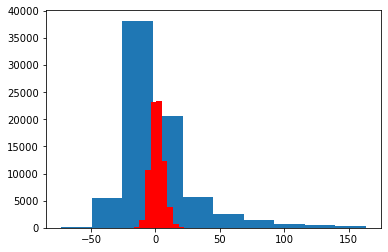

In [110]:
plt.hist(y_vali)
plt.hist(y_pred, color='red')
plt.show()

## XGBoosting

In [54]:
!pip install xgboost

In [55]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [111]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')

In [143]:
# Some of the hyperparameters have already been narrowed down to a smaller range/value.
params_xgb = {
    'colsample_bytree': [0.3, 0.5],
    'learning_rate': [0.17, 0.18, 0.19],
    'max_depth': [11],
    'alpha': [5],
    'n_estimators': [80, 100, 120]
}

In [144]:
xgb_gridsearch = GridSearchCV(xg_reg, param_grid=params_xgb, cv=10)

In [145]:
xgb_gridsearch.fit(X_train_std_10, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
      

In [146]:
xgb_gridsearch.best_params_

{'alpha': 5,
 'colsample_bytree': 0.5,
 'learning_rate': 0.17,
 'max_depth': 11,
 'n_estimators': 80}

In [147]:
y_pred_xgb = xgb_gridsearch.predict(X_vali_std_10)

In [148]:
print(f'MAE: {mean_absolute_error(y_vali, y_pred_xgb)}')
print(f'RMSE: {mean_squared_error(y_vali, y_pred_xgb, squared=False)}')
print(f'R2 score: {r2_score(y_vali, y_pred_xgb)}')

MAE: 17.6566135377522
RMSE: 26.51499278705249
R2 score: 0.15580237918552753


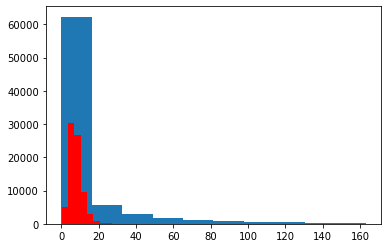

In [63]:
plt.hist(y_vali)
plt.hist(y_pred_xgb, color='red')
plt.show()